In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
# Set display options for better readability
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

In [138]:
# Load dataset
players = pd.read_csv("fifa_players_22.csv", low_memory=False)
print(f"Dataset contains {players.shape[0]} players and {players.shape[1]} attributes.")

Dataset contains 19239 players and 110 attributes.


In [139]:
# Select relevant columns
columns = ['short_name', 'nationality_name', 'preferred_foot', 'player_positions', 'league_name', 'club_name', 'overall']
players = players[columns]

# Ensure appropriate data types
players['overall'] = pd.to_numeric(players['overall'], errors='coerce')  # Convert overall to numeric

# Extract primary position (first position listed)
players['player_positions'] = players['player_positions'].str.split(',').str[0]


In [140]:
# Remove goalkeepers and full-backs from analysis
positions_to_exclude = ['GK', 'LB', 'RB', 'LWB', 'RWB']
total_players = len(players)
players = players[~players['player_positions'].isin(positions_to_exclude)]
filtered_players = len(players)

print(f"{total_players - filtered_players} players removed. Remaining positions: {players['player_positions'].unique()}")

5187 players removed. Remaining positions: ['RW' 'ST' 'LW' 'CM' 'CDM' 'CF' 'LM' 'CB' 'CAM' 'RM']


In [141]:
# Count and calculate percentage of left vs. right-footed players
count_left_right = players.groupby('preferred_foot').size().reset_index(name='count')
count_left_right['percentage'] = round((count_left_right['count'] / count_left_right['count'].sum()) * 100, 1)

In [142]:
count_left_right

,preferred_foot,count,percentage
0,Left,2907,20.7
1,Right,11145,79.3


C:\Users\harsh\AppData\Local\Temp\ipykernel_27060\1335272238.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=count_left_right, x='preferred_foot', y='percentage', palette=['#E74C3C', '#3498DB'], alpha=0.7)


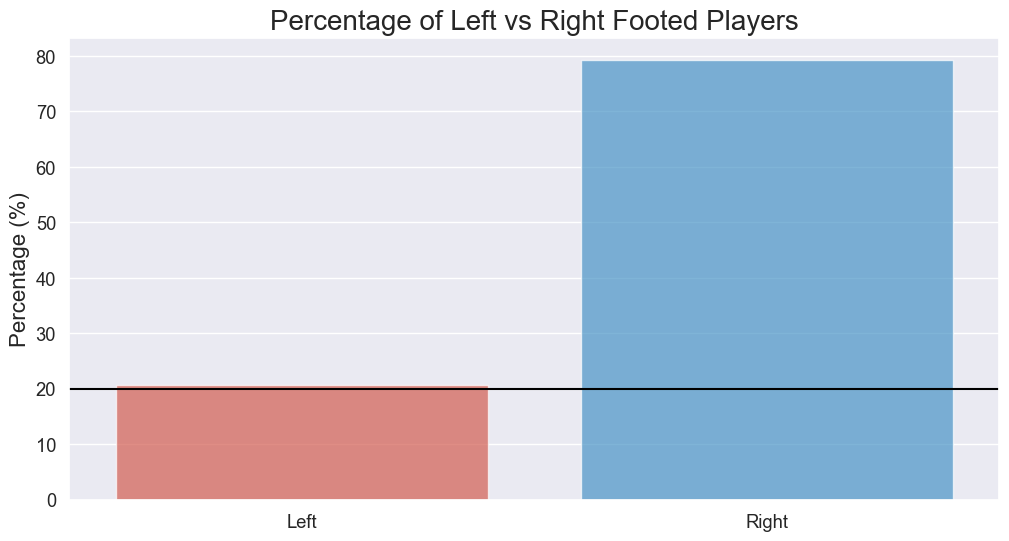

In [143]:
# Plot left vs. right-footed player distribution
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.set(font_scale=1.2)
ax = sns.barplot(data=count_left_right, x='preferred_foot', y='percentage', palette=['#E74C3C', '#3498DB'], alpha=0.7)
ax.axhline(20, color='black')
ax.set_title('Percentage of Left vs Right Footed Players', fontsize=20)
ax.set_ylabel("Percentage (%)", fontsize=16)
ax.set_xlabel("")
plt.show()


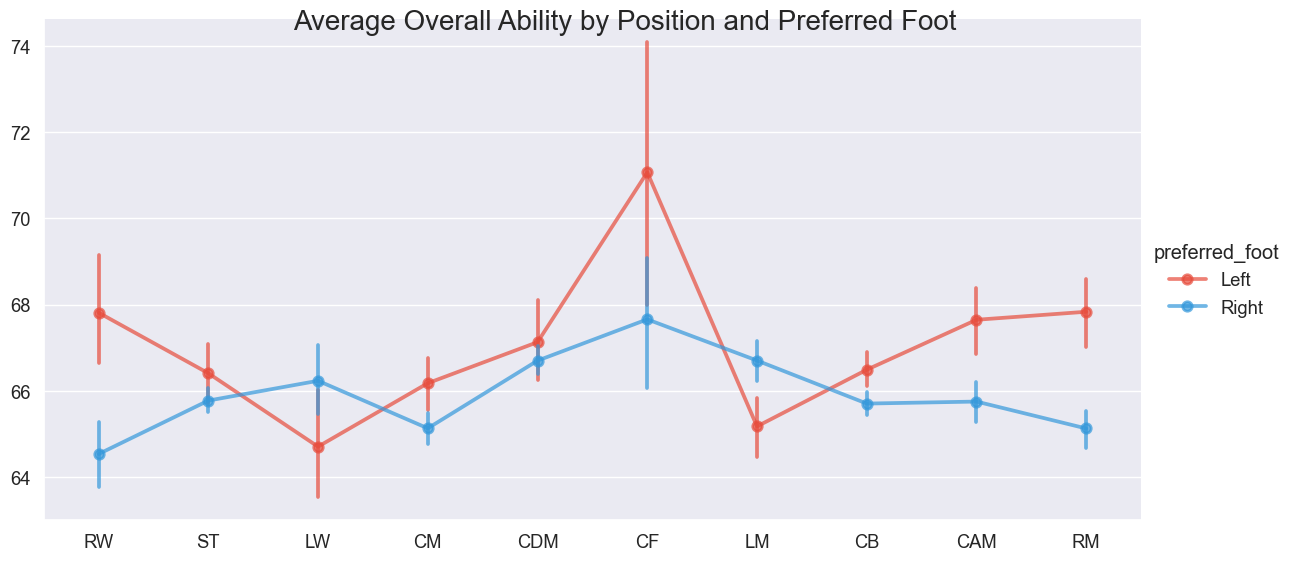

In [144]:
# Analyze average player ability by position and preferred foot
g = sns.catplot(
    data=players, x="player_positions", y="overall", hue="preferred_foot",
    palette=['#E74C3C', '#3498DB'], kind="point", height=6, aspect=2, alpha=0.7
)
g.fig.suptitle('Average Overall Ability by Position and Preferred Foot', fontsize=20)
g.set(xlabel='', ylabel='')
plt.show()

Nation-wise Analysis

In [145]:
# Top 10 nationalities by player count
top_nationalities = players['nationality_name'].value_counts().index[:10]
filtered_players = players[players['nationality_name'].isin(top_nationalities)]
nationality_analysis = filtered_players.pivot_table(
    index='nationality_name',
    columns='preferred_foot',
    values='overall',
    aggfunc='mean'
).fillna(0) 

# Identify left or right-footed dominance
nationality_analysis['Left Dominant'] = nationality_analysis['Left'] > nationality_analysis['Right']
nationality_analysis['Right Dominant'] = nationality_analysis['Right'] > nationality_analysis['Left']
nationality_analysis = nationality_analysis[['Left Dominant', 'Right Dominant']]

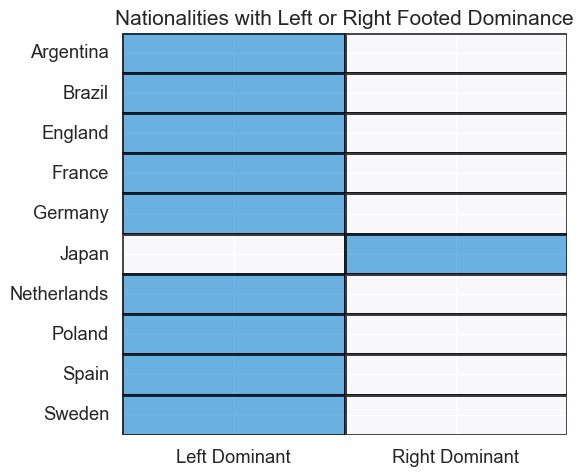

In [146]:
# Plot nationality dominance heatmap
plt.figure(figsize=(6,5), tight_layout=True)
sns.heatmap(nationality_analysis, linewidth=1, linecolor='black', cbar=False, cmap=['#FFFFFF', '#3498DB'], alpha=0.7)
plt.title('Nationalities with Left or Right Footed Dominance', fontsize=15)
plt.xlabel("")  
plt.ylabel("")  
plt.show()


League-wise Analysis

In [147]:
# League analysis: Compare left vs. right-footed players' average ability
league_analysis = players.pivot_table(index='league_name', columns='preferred_foot', values='overall', aggfunc='mean').reset_index()
league_analysis = league_analysis.fillna(0)
league_analysis['difference'] = league_analysis['Left'] - league_analysis['Right']
league_analysis['left_vs_right'] = league_analysis['difference'].apply(lambda x: 'Left Footed' if x > 0 else 'Right Footed')

C:\Users\harsh\AppData\Local\Temp\ipykernel_27060\290043871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=league_analysis['left_vs_right'], palette=['#E74C3C', '#3498DB'], alpha=0.7, order=league_analysis['left_vs_right'].value_counts().index)


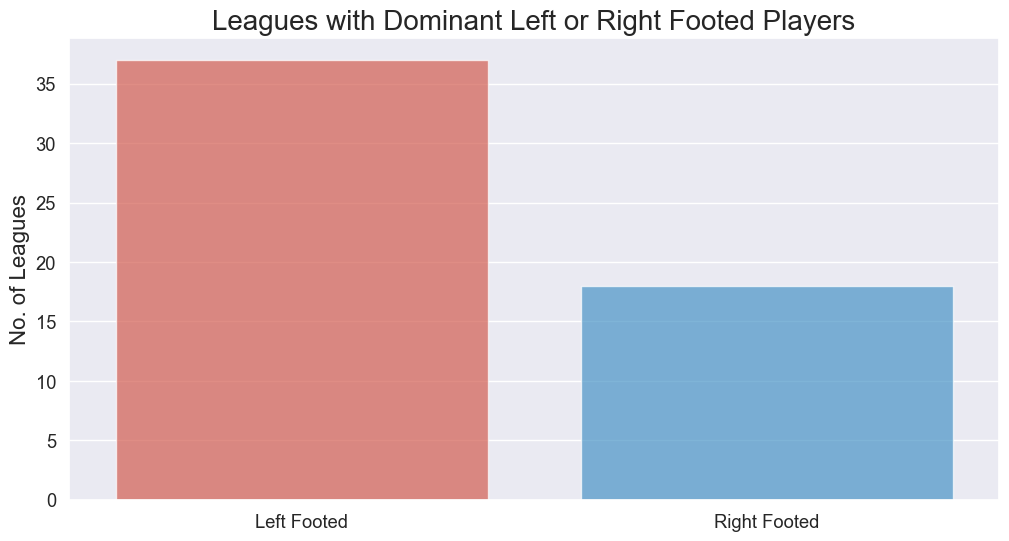

In [148]:
# Count plot with contrasting colors
plt.figure(figsize=(12,6))
sns.countplot(x=league_analysis['left_vs_right'], palette=['#E74C3C', '#3498DB'], alpha=0.7, order=league_analysis['left_vs_right'].value_counts().index)
plt.title('Leagues with Dominant Left or Right Footed Players', fontsize=20)
plt.ylabel("No. of Leagues", fontsize=16)
plt.xlabel("")
plt.show()

Club-wise Analysis

In [149]:
# Filtering for major 5 European leagues
major_leagues = 'French Ligue 1|German 1. Bundesliga|English Premier League|Spain Primera Division|Italian Serie A'
club_analysis = players[players['league_name'].str.contains(major_leagues, na=False)]
club_analysis = club_analysis.pivot_table(index='club_name', columns='preferred_foot', values='overall', aggfunc='mean').reset_index()
club_analysis['difference'] = club_analysis['Left'] - club_analysis['Right']
club_analysis['left_vs_right'] = club_analysis['difference'].apply(lambda x: 'Left Footed' if x > 0 else 'Right Footed')

C:\Users\harsh\AppData\Local\Temp\ipykernel_27060\1859588735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_left_clubs, x='difference', y='club_name', palette='Reds_r', alpha=0.7)


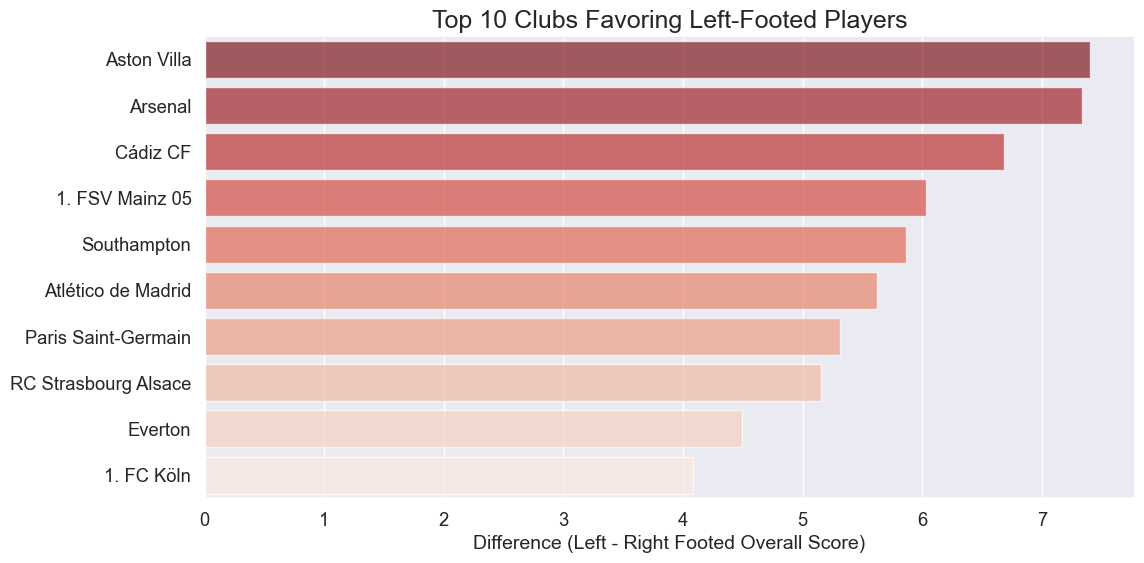

In [150]:
# Display top 10 clubs favoring left-footed players
top_left_clubs = club_analysis[['club_name', 'difference']].sort_values(by='difference', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_left_clubs, x='difference', y='club_name', palette='Reds_r', alpha=0.7)
plt.title('Top 10 Clubs Favoring Left-Footed Players', fontsize=18)
plt.xlabel('Difference (Left - Right Footed Overall Score)', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_27060\23155258.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_right_clubs, x='difference', y='club_name', palette='Blues_r', alpha=0.7)


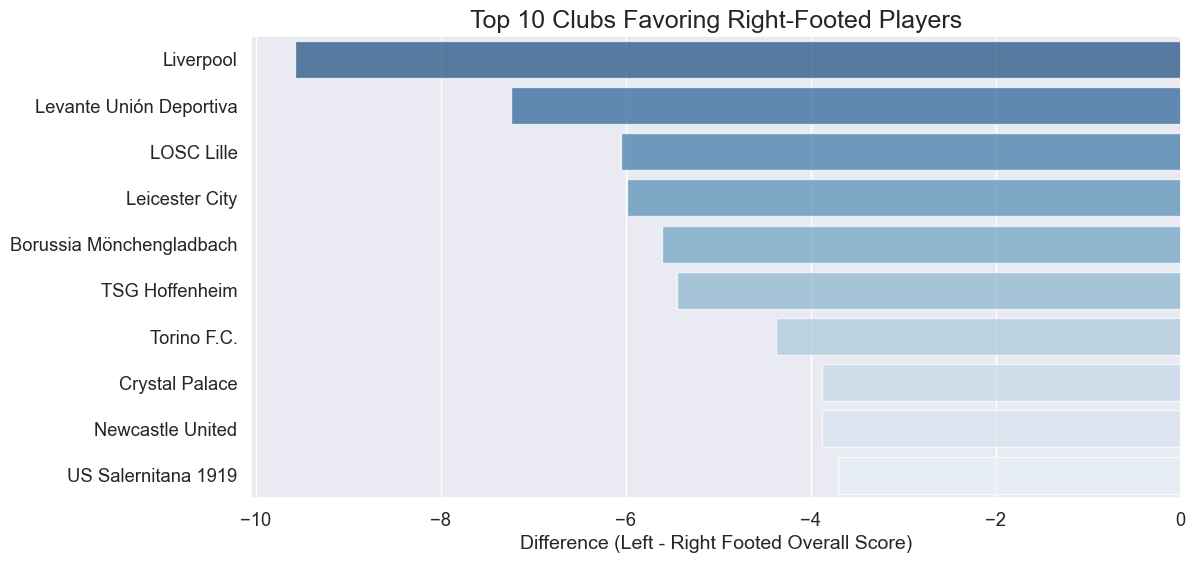

In [151]:
# Display top 10 clubs favoring right-footed players
top_right_clubs = club_analysis[['club_name', 'difference']].sort_values(by='difference', ascending=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_right_clubs, x='difference', y='club_name', palette='Blues_r', alpha=0.7)
plt.title('Top 10 Clubs Favoring Right-Footed Players', fontsize=18)
plt.xlabel('Difference (Left - Right Footed Overall Score)', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()